In [2]:
''' SCRIPT TO CONVERT JSON IN WELL FORMATTED JSON '''

import json

filename = '20221101223100.json'

# Leggi il file come stringa
with open(filename, 'r',  encoding='utf-8') as f:
    input_str = f.read()

# Dividi la stringa di input in linee
lines = input_str.strip().split('\n')


# Converti ogni linea in un dizionario e mettili in una lista
data_list = [json.loads(line) for line in lines]

# Sovrascrivi la lista di dizionari sullo stesso file JSON
with open(filename, 'w',  encoding='utf-8') as f:
    json.dump(data_list, f, indent=2)

In [ ]:
'''formattazione files'''
import json
import os

cartella_input= "C:\\Users\\andre\\Desktop\\Progetto Social\\20221112"
# Ottieni la lista di file nella cartella
files = [f for f in os.listdir(cartella_input) if os.path.isfile(os.path.join(cartella_input, f))]

# Apri il file di output in modalità scrittura
final_file = []
n_file = 0
for file_name in files:
    # Costruisci il percorso completo del file
    file_path = os.path.join(cartella_input, file_name)

    '''sezione per formattare i file correttamente'''
    filename = file_path

    # Leggi il file come stringa
    with open(filename, 'r',  encoding='utf-8') as f:
        input_str = f.read()
    
    # Dividi la stringa di input in linee
    lines = input_str.strip().split('\n')
    
    
    # Converti ogni linea in un dizionario e mettili in una lista
    data_list = [json.loads(line) for line in lines]
    
    # Sovrascrivi la lista di dizionari sullo stesso file JSON
    with open(filename, 'w',  encoding='utf-8') as f:
        json.dump(data_list, f, indent=2)
    n_file += 1
    print(n_file)

In [ ]:
''' SCRIPT TO DELETE COLUMNS'''
import json
import os

cartella_input= "C:\\Users\\andre\\Desktop\\Progetto Social\\20221112"
# Ottieni la lista di file nella cartella
files = [f for f in os.listdir(cartella_input) if os.path.isfile(os.path.join(cartella_input, f))]

# Apri il file di output in modalità scrittura
final_file = []
#numero del file a cui è arrivata la computazione
n_file = 0
for file_name in files:
    # Costruisci il percorso completo del file
    file_path = os.path.join(cartella_input, file_name)
    
    '''sezione pulizia file'''
    # Apri il file corrente in modalità lettura
    with open(file_path, 'r') as input_file:
        # Leggi il contenuto del file e scrivilo nel file di output
        data = json.load(input_file)
        
    var = ['utc_offset','time_zone','profile_background_color','profile_background_image_url','profile_background_image_url_https','profile_background_tile','profile_link_color','profile_sidebar_border_color','profile_sidebar_fill_color','profile_text_color','profile_use_background_image', 'profile_image_url','profile_image_url_https','profile_banner_url','default_profile','default_profile_image','follow_request_sent','notifications','withheld_in_countries','filter_level','truncated','timestamp_ms','favorite_count','quote_count','is_quote_status','contributors','place','coordinates','source','id_str','in_reply_to_status_id','in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_user_id_str','in_reply_to_screen_name']
    
    # Rimuovi la colonna
    for item in data:
        #delle entities salvo solo hashtags e menzioni di utenti
        if 'extended_tweet' in item:
            item['text'] = item['extended_tweet']['full_text']
            if 'entities' in item['extended_tweet']:
                item['hashtags'] = item['extended_tweet']['entities']['hashtags']
                item['user_mentions'] = item['extended_tweet']['entities']['user_mentions']
            else:
                item['hashtags'] = []
                item['user_mentions'] = []
        else:
            item['text'] = item['text']
            if 'entities' in item:
                item['hashtags'] = item['entities']['hashtags']
                item['user_mentions'] = item['entities']['user_mentions']
            else:
                item['hashtags'] = []
                item['user_mentions'] = []
        #elimino tutte le entities
        if 'entities' in item:
            del item['entities']
        if 'extended_entities' in item:
            del item['extended_entities']
        if 'extended_tweet' in item:
            del item['extended_tweet']
        if 'display_text_range' in item:
            del item['display_text_range']
        if 'quoted_status' in item:
            del item['quoted_status']
        if 'quoted_status_permalink' in item:
            del item['quoted_status_permalink']
        if 'quoted_status_id_str' in item:
            del item['quoted_status_id_str']
        if 'quoted_status_id' in item:
            del item['quoted_status_id']
        if 'geo' in item:
            del item['geo']
        if 'possibly_sensitive' in item:
            del item['possibly_sensitive']
        if 'user' in item:
            item['user_id'] = item['user']['id']
            item['user_name'] = item['user']['name']
            item['user_screenname'] = item['user']['screen_name']
            item['user_followers_count'] = item['user']['followers_count']
            #item['user_description'] = item['user']['description']
            del item['user']
        if 'retweeted_status' in item:
            item['retweet_parent_id'] = item['retweeted_status']['id']
            del item['retweeted_status']
        else:
            item['retweet_parent_id'] = -1
        for var_to_delete in var:
            if var_to_delete in item:
                del item[var_to_delete]
        final_file.append(item)
    n_file += 1
    print(n_file)
    

with open('file_prova.json', 'w') as f:
    json.dump(final_file, f,indent=2)


In [ ]:
import json
import langid
import os

cartella_input= "C:\\Users\\andre\\Desktop\\Progetto Social\\file prova"

# Ottieni la lista di file nella cartella
files = [f for f in os.listdir(cartella_input) if os.path.isfile(os.path.join(cartella_input, f))]
parole_chiave_inglese = [
    "radioactivity",
    "nuclear fission",
    "isotopes",
    "nuclear military",
    "atomic energy",
    "nuclear energy",
    "graphite",
    "nuclear risks",
    "nuclear proliferation",
    "nuclear",
    "nuclear accident",
    "Chernobyl",
    "Fukushima",
    "nuclear waste",
    "nuclear disarmament",
    "nuclear deterrence",
    "nuclear test",
    "nuclear agreement",
    "nuclear radiation",
    "management of nuclear waste",
    "national nuclear programs",
    "sustainable nuclear energy",
    "international nuclear negotiations"
]
parole_chiave_portoghese = [
    "radioatividade",
    "fissão nuclear",
    "isótopos",
    "militar nuclear",
    "energia atômica",
    "energia nuclear",
    "grafite",
    "riscos nucleares",
    "proliferação nuclear",
    "nuclear",
    "acidente nuclear",
    "Chernobyl",
    "Fukushima",
    "resíduos nucleares",
    "desarmamento nuclear",
    "dissuasão nuclear",
    "teste nuclear",
    "acordo nuclear",
    "radiação nuclear",
    "gestão de resíduos nucleares",
    "programas nucleares nacionais",
    "energia nuclear sustentável",
    "negociações nucleares internacionais"
]
parole_chiave_tedesco = [
    "Radioaktivität",
    "Nukleare Spaltung",
    "Isotope",
    "Nukleare Militär",
    "Atomenergie",
    "Nukleare Energie",
    "Graphit",
    "Nukleare Risiken",
    "Nukleare Proliferation",
    "Nuklear",
    "Nuklearer Unfall",
    "Tschernobyl",
    "Fukushima",
    "Nuklearer Abfall",
    "Nukleare Abrüstung",
    "Nukleare Abschreckung",
    "Nukleartest",
    "Nuklearabkommen",
    "Nukleare Strahlung",
    "Management von Nuklearabfällen",
    "Nationale Nuklearprogramme",
    "Nachhaltige Nuklearenergie",
    "Internationale Nuklearverhandlungen"
]
parole_chiave_spagnole = [
    "radioactividad",
    "fisión nuclear",
    "isótopos",
    "militar nuclear",
    "energía atómica",
    "energía nuclear",
    "grafito",
    "riesgos nucleares",
    "proliferación nuclear",
    "nuclear",
    "accidente nuclear",
    "Chernobyl",
    "Fukushima",
    "residuos nucleares",
    "desarme nuclear",
    "disuasión nuclear",
    "prueba nuclear",
    "acuerdo nuclear",
    "radiación nuclear",
    "gestión de residuos nucleares",
    "programas nucleares nacionales",
    "energía nuclear sostenible",
    "negociaciones nucleares internacionales"
]
parole_chiave_italiano = [
    "radioattività",
    "fissione nucleare",
    "isotopi",
    "militare nucleare",
    "energia atomica",
    "energia nucleare",
    "grafite",
    "rischi nucleari",
    "proliferazione nucleare",
    "nucleare",
    "incidente nucleare",
    "Chernobyl",
    "Fukushima",
    "rifiuti nucleari",
    "disarmo nucleare",
    "dissuasione nucleare",
    "test nucleare",
    "accordo nucleare",
    "radiazione nucleare",
    "gestione dei rifiuti nucleari",
    "programmi nucleari nazionali",
    "energia nucleare sostenibile",
    "negoziazioni nucleari internazionali"
]
parole_chiave_francese = [
    "radioactivité",
    "fission nucléaire",
    "isotopes",
    "militaire nucléaire",
    "énergie atomique",
    "énergie nucléaire",
    "graphite",
    "risques nucléaires",
    "prolifération nucléaire",
    "nucléaire",
    "accident nucléaire",
    "Tchernobyl",
    "Fukushima",
    "déchets nucléaires",
    "désarmement nucléaire",
    "dissuasion nucléaire",
    "essai nucléaire",
    "accord nucléaire",
    "radiation nucléaire",
    "gestion des déchets nucléaires",
    "programmes nucléaires nationaux",
    "énergie nucléaire durable",
    "négociations nucléaires internationales"
]


tweet_filtrati_inglese = []
tweet_filtrati_portoghese = []
tweet_filtrati_tedesco = []
tweet_filtrati_spagnolo = []
tweet_filtrati_italiano = []
tweet_filtrati_francese = []

for file_name in files:
    if file_name=="1113.json":
        file_path = os.path.join(cartella_input, file_name)
        with open(file_path, 'r') as input_file:
                # Leggi il contenuto del file e scrivilo nel file di output
                data = json.load(input_file)
        for item in data:
            lingua, _ = langid.classify(item['text'])
            print(lingua)
            
            # Applica le parole chiave solo ai tweet in inglese
            match lingua:
                case 'en':
                    if any(parola.lower() in item['text'].lower() for parola in parole_chiave_inglese):
                        tweet_filtrati_inglese.append(item)
                case 'pt':
                    if any(parola.lower() in item['text'].lower() for parola in parole_chiave_portoghese):
                        tweet_filtrati_portoghese.append(item)
                case 'de':
                    if any(parola.lower() in item['text'].lower() for parola in parole_chiave_tedesco):
                        tweet_filtrati_tedesco.append(item)
                case 'es':
                    if any(parola.lower() in item['text'].lower() for parola in parole_chiave_spagnole):
                        tweet_filtrati_spagnolo.append(item)
                case 'it':
                    if any(parola.lower() in item['text'].lower() for parola in parole_chiave_italiano):
                        tweet_filtrati_italiano.append(item)
                case 'fr':
                    if any(parola.lower() in item['text'].lower() for parola in parole_chiave_francese):
                        tweet_filtrati_francese.append(item)
    
with open('en.json', 'w') as f1:
    json.dump(tweet_filtrati_inglese, f1,indent=2)
    f1.close()
with open('pt.json', 'w') as f2:
    json.dump(tweet_filtrati_portoghese, f2,indent=2)
    f2.close()
with open('de.json', 'w') as f3:
    json.dump(tweet_filtrati_tedesco, f3,indent=2)
    f3.close()
with open('es.json', 'w') as f4:
    json.dump(tweet_filtrati_spagnolo, f4,indent=2)
    f4.close()
with open('it.json', 'w') as f5:
    json.dump(tweet_filtrati_italiano, f5,indent=2)
    f5.close()
with open('fr.json', 'w') as f6:
    json.dump(tweet_filtrati_francese, f6,indent=2)
    f6.close()

In [1]:
'''Unire i files'''
import json
import langid
import os

cartella_input= "C:\\Users\\andre\\PycharmProjects\\Progetto-Social\\filtered"

# Ottieni la lista di file nella cartella
dirs = [d for d in os.listdir(cartella_input) if os.path.isdir(os.path.join(cartella_input, d))]

inglese = []
portoghese = []
tedesco = []
spagnolo = []
italiano = []
francese = []

for dir in dirs:
    folder_name = os.path.join(cartella_input, dir)
    files = [f for f in os.listdir(folder_name) if os.path.isfile(os.path.join(folder_name, f))] 

    for file in files:
        file_path = os.path.join(folder_name, file)
        with open(file_path, 'r') as input_file:
                # Leggi il contenuto del file e scrivilo nel file di output
                data = json.load(input_file)
        for item in data:
            # inserisco i dati della lingua del file corrispondente
            match file:
                case "en.json":
                    inglese.append(item)
                case "pt.json":
                    portoghese.append(item)
                case "de.json":
                    tedesco.append(item)
                case "es.json":
                    spagnolo.append(item)
                case "it.json":
                    italiano.append(item)
                case "fr.json":
                    francese.append(item)
                
with open('inglese.json', 'w') as f1:
    json.dump(inglese, f1,indent=2)
    f1.close()
with open('portoghese.json', 'w') as f2:
    json.dump(portoghese, f2,indent=2)
    f2.close()
with open('tedesco.json', 'w') as f3:
    json.dump(tedesco, f3,indent=2)
    f3.close()
with open('spagnolo.json', 'w') as f4:
    json.dump(spagnolo, f4,indent=2)
    f4.close()
with open('italiano.json', 'w') as f5:
    json.dump(italiano, f5,indent=2)
    f5.close()
with open('francese.json', 'w') as f6:
    json.dump(francese, f6,indent=2)
    f6.close()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


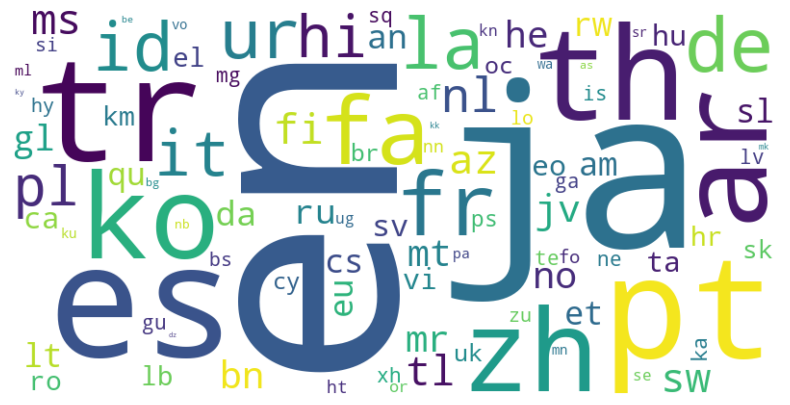

In [4]:
import nltk
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nltk.download('punkt')  # Scarica i dati necessari per il tokenization

with open('C:\\Users\\andre\\Desktop\\prova lingue.txt', 'r') as f:
    testo_di_esempio = f.read()
# Testo di esempio (puoi sostituire questo con il tuo testo o leggerlo da un file)

# Tokenization del testo
parole = word_tokenize(testo_di_esempio)

# Calcolo della word frequency
frequenza_parole = FreqDist(parole)

# Creazione di un'immagine di WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frequenza_parole)

# Visualizzazione della WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [7]:
'''script per un file'''
''' SCRIPT TO DELETE COLUMNS'''
import json

# Carica i dati JSON
with open('20221101223100.json', 'r') as f:
    data = json.load(f)

var = ['utc_offset','time_zone','profile_background_color','profile_background_image_url','profile_background_image_url_https','profile_background_tile','profile_link_color','profile_sidebar_border_color','profile_sidebar_fill_color','profile_text_color','profile_use_background_image', 'profile_image_url','profile_image_url_https','profile_banner_url','default_profile','default_profile_image','follow_request_sent','notifications','withheld_in_countries','filter_level']


final_file = []
# Rimuovi la colonna
for item in data:
    if 'entities' in item:
        del item['entities']
    if 'extended_entities' in item:
        del item['extended_entities']
    if 'extended_tweet' in item:
        del item['extended_tweet']
    if 'display_text_range' in item:
        del item['display_text_range']
    if 'quoted_status' in item:
        del item['quoted_status']
    if 'quoted_status_permalink' in item:
        del item['quoted_status_permalink']
    if 'quoted_status_id_str' in item:
        del item['quoted_status_id_str']
    if 'quoted_status_id' in item:
        del item['quoted_status_id']
    if 'geo' in item:
        del item['geo']
    if 'possibly_sensitive' in item:
        del item['possibly_sensitive']
    for var_to_delete in var:
        if var_to_delete in item:
            del item[var_to_delete]
    if 'user' in item:
        item['user_id'] = item['user']['id']
        item['user_name'] = item['user']['name']
        item['user_screenname'] = item['user']['screen_name']
        item['user_description'] = item['user']['description']
        del item['user']
    if 'retweeted_status' in item:
        item['retweet_parent_id'] = item['retweeted_status']['id']
        del item['retweeted_status']
    else:
        item['retweet_parent_id'] = -1
        
    final_file.append(item)

with open('file_prova.json', 'w') as f:
    json.dump(final_file, f,indent=2)

In [13]:
# conta tweet in un file
import json
with open('inglese.json', 'r') as f:
    data = json.load(f)
    
n = 0
for item in data:
    if item['id'] == 1593276975770222592:
        n += 1
print("numero tweet: ", n)

numero tweet:  0
